## Dataset
#### Allen Institute for Brain Science: Visual Coding - Neuropixels

© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels).

## Basic dataset details
e.g. number of subjects, genotypes, and sexes

##### Imports

In [1]:
# imports
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import resample

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

##### Load session data

In [4]:
# set manifest path and project cache
manifest_path = join('/micha/visual_encoding/ecephys_cache_dir/', "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

# get session info for Brain Observatory sessions
sessions_all = cache.get_session_table()
sessions = sessions_all[sessions_all["session_type"] == "brain_observatory_1.1"] # "functional_connectivity"] # 
session_ids = sessions.index

# print number of sessions
print('Number of sessions (subjects): %d' %len(sessions))

Number of sessions (subjects): 32


#### Sex and genotype

In [5]:
for gt in np.unique(sessions['full_genotype']):
    n = np.sum(sessions['full_genotype']==gt)
    nM = np.sum([(sessions['full_genotype']==gt) & (sessions['sex']=='M')])
    nF = np.sum([(sessions['full_genotype']==gt) & (sessions['sex']=='F')])
    
    print('---------------------------------------------------------')
    print('Genotype: %s' %gt)
    print('Subjects: %d (%d females)' %(n, nF))


---------------------------------------------------------
Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
Subjects: 5 (2 females)
---------------------------------------------------------
Genotype: Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
Subjects: 6 (1 females)
---------------------------------------------------------
Genotype: Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
Subjects: 5 (2 females)
---------------------------------------------------------
Genotype: wt/wt
Subjects: 16 (0 females)


## Recording details
brain regions, channel counts, and single-unit counts

##### Brain regions

In [45]:
regions = channels.ecephys_structure_acronym.unique()

print("Total brain regions recorded: %d" %len(regions))
print("Region Acronyms:")
print(regions)

Total brain regions recorded: 62
Region Acronyms:
['APN' 'LP' 'MB' 'DG' 'CA1' 'VISrl' nan 'TH' 'LGd' 'CA3' 'VIS' 'CA2'
 'ProS' 'VISp' 'POL' 'VISpm' 'PPT' 'OP' 'NOT' 'HPF' 'SUB' 'VISam' 'ZI'
 'LGv' 'VISal' 'VISl' 'SGN' 'SCig' 'MGm' 'MGv' 'VPM' 'grey' 'Eth' 'VPL'
 'IGL' 'PP' 'PIL' 'PO' 'VISmma' 'POST' 'SCop' 'SCsg' 'SCzo' 'COApm' 'OLF'
 'BMAa' 'SCiw' 'COAa' 'IntG' 'MGd' 'MRN' 'LD' 'VISmmp' 'CP' 'VISli' 'PRE'
 'RPF' 'LT' 'PF' 'PoT' 'VL' 'RT']


##### Recording channels and unit counts

In [103]:
# define function to count the number of channels and units in a brain region

def region_counts(project_cache, region):
    # This function counts the number of channels and units in a brain region
    
    # unpack project chache
    channels = cache.get_channels()
    units = cache.get_units()
    
    # count units for a single region
    if type(region) == str:
        # get channels for chosen region
        chans = channels[(channels.ecephys_structure_acronym==region)]

        # count units for each channel
        total = np.zeros(len(chans))
        for ii, chan_id in enumerate(chans.index):
            total_units[ii] = np.sum(units.ecephys_channel_id == chan_id)

        # count channels and sum number of units across channels channels
        n_channels = len(chans)
        n_units = int(np.sum(total_units))
        
    # count units for a list of regions
    elif (type(region) == np.ndarray) or (type(region) == list) or (type(region) == tuple):
        # create empty array for each region
        n_channels = np.zeros(len(region))
        n_units = np.zeros(len(region))
        
        # loop through each region of interest
        for rr, reg in enumerate(region):
            # get channels for chosen region
            chans = channels[(channels.ecephys_structure_acronym==reg)]

            # count units for each channel
            total_units = np.zeros(len(chans))
            for ii, chan_id in enumerate(chans.index):
                total_units[ii] = np.sum(units.ecephys_channel_id == chan_id)

            # count channels and sum number of units across channels channels
            n_channels[rr] = len(chans)
            n_units[rr] = int(np.sum(total_units))
        
    return n_channels, n_units

In [ ]:
# count channels and units in brain regions of interest

regions_of_interest = ('VISp', 'LGd')
n_channels, n_units = region_counts(cache, regions_of_interest)

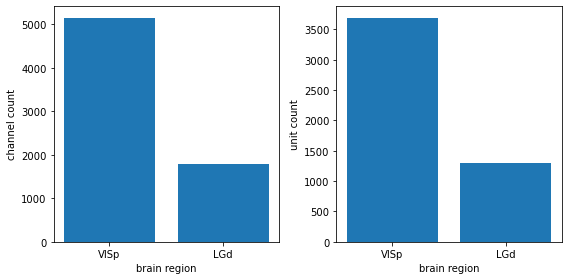

In [119]:
# plot channel and unit counts

fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=[8,4], tight_layout=True)
X = np.linspace(0, len(regions_of_interest)-1, len(regions_of_interest))

ax_1.bar(X, n_channels, tick_label=regions_of_interest)
ax_1.set_ylabel('channel count')
ax_1.set_xlabel('brain region')

ax_2.bar(X, n_units, tick_label=regions_of_interest)
ax_2.set_ylabel('unit count')
ax_2.set_xlabel('brain region');
